In [5]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [6]:
data=pd.read_csv('data_banknote_to_verify.txt',header=None)
data.columns=['var','skew','curt','entr','auth']
print(data.head())

       var    skew    curt     entr  auth
0  3.62160  8.6661 -2.8073 -0.44699     0
1  4.54590  8.1674 -2.4586 -1.46210     0
2  3.86600 -2.6383  1.9242  0.10645     0
3  3.45660  9.5228 -4.0112 -3.59440     0
4  0.32924 -4.4552  4.5718 -0.98880     0


In [7]:
print(data.info) # data expploration

<bound method DataFrame.info of           var      skew     curt     entr  auth
0     3.62160   8.66610  -2.8073 -0.44699     0
1     4.54590   8.16740  -2.4586 -1.46210     0
2     3.86600  -2.63830   1.9242  0.10645     0
3     3.45660   9.52280  -4.0112 -3.59440     0
4     0.32924  -4.45520   4.5718 -0.98880     0
...       ...       ...      ...      ...   ...
1367  0.40614   1.34920  -1.4501 -0.55949     1
1368 -1.38870  -4.87730   6.4774  0.34179     1
1369 -3.75030 -13.45860  17.5932 -2.77710     1
1370 -3.56370  -8.38270  12.3930 -1.28230     1
1371 -2.54190  -0.65804   2.6842  1.19520     1

[1372 rows x 5 columns]>


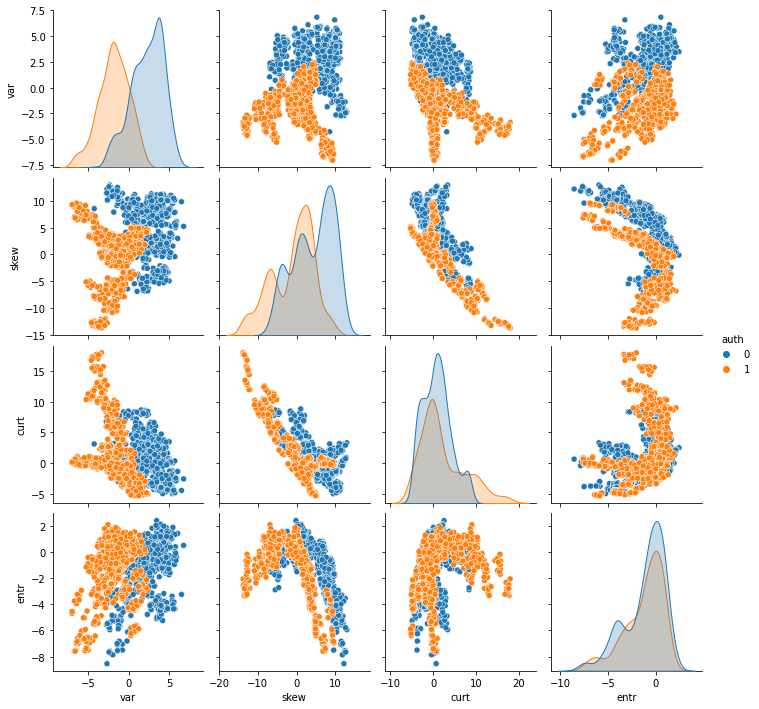

In [8]:
sbn.pairplot(data,hue='auth') # to draw overview of our data and to check that  we have no any missing value
plt.show() #orange for original &  blue for counterfit banknotes 

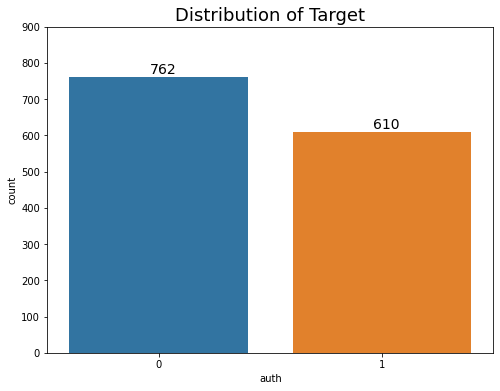

In [10]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target',size=18)
sbn.countplot(x=data['auth'])
target_count=data.auth.value_counts()
plt.annotate(s=target_count[0],xy=(-0.04,10+target_count[0]),size=14)
plt.annotate(s=target_count[1],xy=(0.96,10+target_count[1]),size=14)
plt.ylim(0,900)
plt.show()

In [11]:
nb_to_delete=target_count[0]-target_count[1]
data=data.sample(frac=1,random_state=42).sort_values(by='auth')
data=data[nb_to_delete:]
print(data['auth'].value_counts())

0    610
1    610
Name: auth, dtype: int64


In [12]:
x=data.loc[:,data.columns !='auth'] #now with prefectly balanced data we will divide data into training and test sets
y=data.loc[:,data.columns == 'auth']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
scalar=StandardScaler() #standardize the data with StandardScalar method provided by Scikit-learn
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)

In [15]:
clf  = LogisticRegression(solver='lbfgs',random_state=42,multi_class='auto')
clf.fit(x_train,y_train.values.ravel())
#  here we will detect fake currency detection by using the Logistic Regression Algorithm
#  first we fit the data on the Logistic Regresssion model to train the model

LogisticRegression(random_state=42)

In [16]:
y_pred=np.array(clf.predict(x_test))  #let's test accuracy of our model
conf_mat = pd.DataFrame(confusion_matrix(y_test,y_pred),
                        columns=["Pred.Negative","Pred.Positive"],
                        index=["Act.Negative","Act.Positive"])
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
accuracy=round((tn+tp)/(tn+fp+fn+tp),4)
print(conf_mat)
print(f'\n Accuracy = {round(100*accuracy,2)}%')

              Pred.Negative  Pred.Positive
Act.Negative            187              6
Act.Positive              0            173

 Accuracy = 98.36%


In [17]:
new_banknote = np.array([4.5,-8.1,2.4,1.4],ndmin=2) #let's try to predict a single sample banknote
new_banknote=scalar.transform(new_banknote) #extract, scale and integrate into our pre-trained model
print(f'Prediction: Class{clf.predict(new_banknote)[0]}')
print(f'Probability [0/1]: {clf.predict_proba(new_banknote)[0]}')    

Prediction: Class0
Probability [0/1]: [0.61112576 0.38887424]
